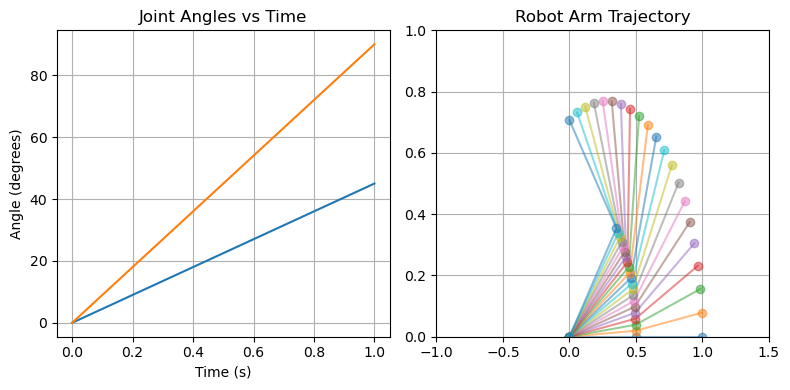

In [4]:
import numpy as np
import matplotlib.pyplot as plt

l1, l2 = 0.5, 0.5  
T = 1.0            
dt = 0.01          
t = np.arange(0, T + dt, dt) 
q1_start, q1_end = 0, 45
q2_start, q2_end = 0, 90
q1_t = np.linspace(q1_start, q1_end, len(t))
q2_t = np.linspace(q2_start, q2_end, len(t))

def roboticarm(l1, l2, q1, q2):
    r1, r2 = np.radians(q1), np.radians(q2)
    
    x0, y0 = 0, 0
    x1 = l1 * np.cos(r1)
    y1 = l1 * np.sin(r1)
    x2 = x1 + l2 * np.cos(r1 + r2)
    y2 = y1 + l2 * np.sin(r1 + r2)
    return [x0, x1, x2], [y0, y1, y2]


plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(t, q1_t)
plt.plot(t, q2_t)
plt.title("Joint Angles vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.grid(True)

plt.subplot(1,2,2)
for i in range(0, len(t), 5):
    x, y = roboticarm(l1, l2, q1_t[i], q2_t[i])
    plt.plot(x, y, marker='o', alpha=0.5)

plt.title("Robot Arm Trajectory")
plt.xlim(-1, 1.5)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

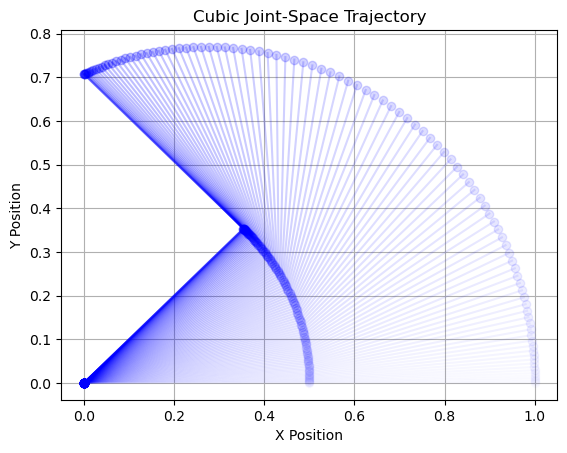

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup Parameters
l1, l2 = 0.5, 0.5    
T = 1.0            
t = np.linspace(0, T, 100) 

# 2. Define Start and End Angles
q1_start, q1_end = 0, 45
q2_start, q2_end = 0, 90

# Plot the arm at different time steps to show the "motion"
plt.plot()
for i in range(len(t)):
    x, y = roboticarm(l1, l2, q1_t[i], q2_t[i])
    # Alpha increases so the final position is the darkest
    alpha_val = (i + 1) / len(t) 
    plt.plot(x, y, 'o-', color='blue', alpha=alpha_val * 0.3)

# Mark the final target position (the Cup)
plt.title("Cubic Joint-Space Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.show()

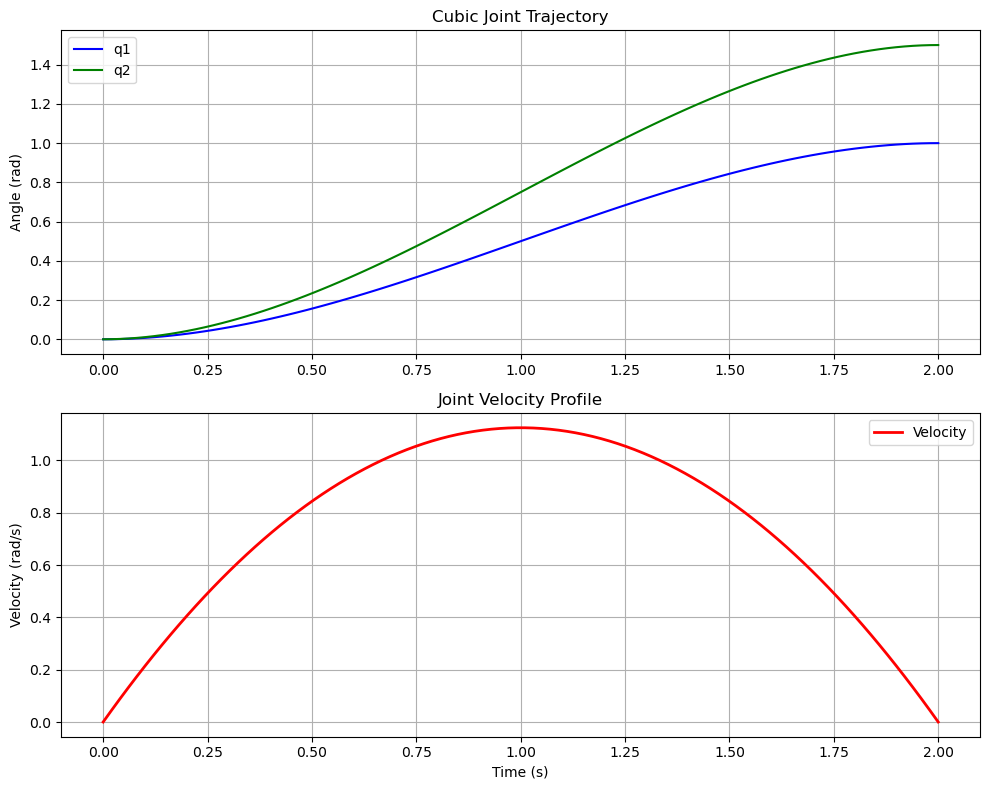

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_trajectory(q0, qf, t0, tf, num_points):  
    A = np.array([[1, t0, t0**2, t0**3],
                  [1, tf, tf**2, tf**3],
                  [0, 1, 2*t0, 3*t0**2],
                  [0, 1, 2*tf, 3*tf**2]])

    b = np.array([q0, qf, [0]*len(q0), [0]*len(q0)])
    coeffs = np.linalg.solve(A, b)

    times = np.linspace(t0, tf, num_points)

    T = times[:, None]
    positions = coeffs[0] + coeffs[1] * T + coeffs[2] * T ** 2 + coeffs[3] * T ** 3
    velocities = coeffs[1] + 2 * coeffs[2] * T + 3 * coeffs[3] * T ** 2
    accelerations = 2 * coeffs[2] + 6 * coeffs[3] * T

    return times, positions, velocities, accelerations
q0 = [0.0]        
qf1 = [1.0] 
qf2 = [1.5]
t0 = 0           
tf = 2           
num_points = 100  

t, q1, v, a = cubic_trajectory(q0, qf1, t0, tf, num_points)
t, q2, v, a = cubic_trajectory(q0, qf2, t0, tf, num_points)

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, q1, label='q1', color='blue')
plt.plot(t, q2, label='q2', color='green')
plt.title('Cubic Joint Trajectory')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, v, label='Velocity', color='red', linewidth=2)
plt.title('Joint Velocity Profile')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (rad/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()